#**CLUSTER ANALYSIS OF GENE EXPRESSION**

**Introduction and problem statement:**


Human genes are made up of DNA. Deoxyribonucleic acidis amolecule composed of two polynucleotide chains thatcoil aroundeach other to form a double helix carrying geneticinstructionsfor the development, functioning, growth and reproductionof allknown organisms and many viruses.


A nucleotide is an organic molecule that is usuallytermed asATCG [ adenine (A), cytosine (C), guanine (G), andthymine (T)].The triplet permutation, combination of these nucleotidesfromamino acids. Chain of amino acids leads to the formationofproteins. These proteins make up the important biologicalcomponent DNA. A point mutation iswhen a single basepair isaltered. For example in place of ATC if ATG is presentthat willbe a point mutation . Our blood cells have DNAs. Consideringacertain type of cancer is initiated by a virus. The virus wouldlead to point mutation.  Some certain point mutationslead tothe formation of cancer cells.

Our project is to come up with an algorithm that clustersthepoint mutation to the formation of brain cancer cells.

## Import statements and loading the datasets

In [ ]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_validate, train_test_split
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
df = pd.read_csv('/content/mydrive/MyDrive/Brain_GSE50161.csv')
df3=df
df.sample(5)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
62,896,glioblastoma,11.664942,10.263776,7.985940,8.610078,4.846842,7.800649,6.920450,6.205141,5.671931,4.753017,9.515849,8.834408,6.567828,8.842339,10.112605,6.239843,5.664622,7.701967,8.703250,6.310010,6.477377,7.026200,6.896648,6.798556,7.097843,6.342911,10.550320,6.305335,7.662230,4.708510,6.963646,6.801407,8.124052,8.784272,5.358694,5.406996,7.609326,6.689862,...,8.996312,11.183394,13.095953,11.451765,3.603301,3.775117,4.225231,6.495801,11.967792,10.464613,6.658496,4.418435,3.893184,3.625636,3.983780,3.614215,3.686906,3.862984,3.708987,3.988476,3.704704,4.101958,5.009566,4.584174,4.789619,9.076006,9.214041,9.168959,10.323518,10.142015,12.286293,11.687802,13.740020,13.539707,5.072249,4.683036,3.888789,3.773484,4.823127,4.655017
69,903,glioblastoma,13.291245,8.986773,8.233971,10.031521,6.021911,8.313317,6.450698,6.447425,6.007618,5.043498,8.364661,8.786298,7.319017,9.953709,9.429382,6.360033,5.950973,6.706679,7.789504,6.722699,5.463665,7.213221,7.421487,7.710566,7.188767,6.327488,9.684536,6.717464,8.714841,5.662345,8.135323,7.022850,7.594015,7.605628,4.848552,6.478789,7.578651,7.062258,...,8.033387,6.580211,5.037577,5.335450,3.669243,3.548088,4.433678,8.043142,7.251134,9.597944,6.222145,4.074086,4.023713,3.513075,3.550991,3.519253,3.742250,3.272200,3.589790,4.539465,3.526111,3.691231,4.772280,4.914492,5.512102,8.697438,9.188115,8.948844,10.517907,10.639663,12.783041,12.200594,13.973968,13.990528,5.115070,4.992393,4.020655,3.733796,4.590452,4.515942
6,840,ependymoma,13.655639,7.980903,7.566620,10.102907,4.659353,8.457659,6.187350,7.533436,6.555950,5.639933,8.357096,8.439834,7.772475,9.880384,8.845293,6.245312,5.998365,6.597233,9.304015,5.913379,8.770135,7.303062,7.118891,7.605744,7.812292,7.050946,8.264242,8.197562,9.513964,5.678790,8.423227,7.751046,7.010453,7.281032,5.093428,6.901443,7.924842,6.494657,...,8.856348,6.488815,4.961885,4.629998,3.650402,3.548174,4.512569,8.544301,6.707186,9.391332,6.156386,4.004741,3.821732,3.422291,3.955451,3.289727,3.671366,3.448382,3.541738,4.516583,3.458311,4.030747,5.438478,5.815225,5.013769,7.495351,7.604891,7.130932,8.995404,8.937849,12.107981,11.560651,13.729656,13.557003,5.508786,5.022758,3.967091,3.735595,4.450776,4.771273
32,866,ependymoma,12.162547,7.723421,7.344732,9.392601,4.206012,7.531824,5.999463,6.634666,6.396447,5.353603,7.556856,7.397056,7.279108,8.788786,8.093185,6.159384,6.102639,5.685970,8.929610,6.197978,8.224708,6.394808,6.484325,6.715594,6.754172,6.707492,8.050746,6.763785,8.233204,6.072327,7.496329,8.201550,6.615607,6.317858,6.475681,6.367871,7.474179,6.153185,...,7.908299,6.355079,4.946139,4.924926,3.838375,3.830806,4.250980,8.558355,6.132857,8.804250,5.842398,3.953333,3.945894,3.703880,3.874056,3.465329,3.866307,3.544735,3.635754,4.640889,3.656892,4.303325,4.831605,6.307924,4.868862,7.036698,7.5

## Statistics and cleaning

In [ ]:
df = df.iloc[:, :30]
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,7.541986,7.905140,7.108117,8.386617,8.412090,6.560058,5.779307,5.596102,9.128874,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,8.317030,8.269136,7.250662,9.208559,8.466202,5.822008,5.862887,5.573160,8.853524,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,7.661874,8.327897,7.557231,9.344553,9.161303,6.352456,5.703981,6.296894,8.912298,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,7.663790,7.730238,6.890946,8.996408,7.967699,5.565398,5.656941,7.255397,7.725901,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,9.521956,7.581397,6.927562,10.040652,9.611351,5.993222,5.874362,6.635761,9.721766,5.603343,8.221752,5.950401,5.752766,7.916434,8.139826,6.739943,9.620339,6.869073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,7.014209,8.666578,6.865731,10.233177,8.702926,6.022244,5.495157,7.732983,7.950551,6.092506,4.996330,6.648274,6.167474,7.350546,7.826477,6.518363,9.653409,6.987723
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,7.981177,8.737005,6.972961,9.902292,9.495424,5.928188,5.715604,7.015560,8.860841,5.763458,5.379189,7.140106,6.773599,8.527913,8.150819,6.870945,9.880342,6.748734
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,6.638493,8.724114,7.508863,9.638112,8.974358,5.593812,5.765813,7.701301,7.953218,5.794077,4.627095,6.598436,6.486709,7.797212,8.870719,6.302038,9.499624,6.871915
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,5.140635,7.225376,8.333919,7.271261,10.145374,8.850534,5.821805,5.097433,7.097866,8.102766,5.406210,4.917388,6.388659,6.244366,8.126196,8.580536,6.622244,9.190213,7.262452


In [ ]:
df.shape

(130, 30)

In [ ]:
item_counts = df["type"].value_counts()
print(item_counts)

ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: type, dtype: int64


In [ ]:
df.groupby('type').mean()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ependymoma,856.5,12.757993,8.574604,7.961404,9.185998,4.394862,8.167767,6.721387,6.715342,6.074168,5.574137,7.644367,8.173137,7.026195,9.171330,8.949848,5.905244,5.702671,6.642655,8.594125,6.092941,7.943505,6.796236,6.663841,7.321220,7.333074,6.705000,9.042233,6.920146
glioblastoma,896.5,12.416854,9.248950,8.205626,9.221384,4.872213,8.082259,6.646216,6.264813,6.423971,5.358064,8.495026,8.595157,7.152979,9.911828,9.116626,6.203540,5.688866,7.178769,8.388430,6.165160,5.553772,6.925380,6.938964,7.695365,7.947540,6.616440,9.644360,6.656626
medulloblastoma,924.5,11.186921,9.095945,6.943021,8.954618,4.551997,7.366364,6.879751,6.626279,5.591145,5.359556,7.280913,8.426901,7.035839,8.870634,9.574546,5.915915,5.658776,6.713252,8.199253,5.847718,5.175197,7.021018,6.912114,7.164003,7.662565,6.605266,9.558987,6.702227
normal,942.0,11.309117,8.038706,7.073371,9.066114,6.048279,7.456813,7.352496,5.923572,5.520755,6.603008,7.836222,8.880573,7.237660,9.524893,9.312776,5.865975,5.728755,6.457595,8.274847,5.589233,4.777018,6.715324,6.464875,8.055728,8.236923,6.738119,8.706774,6.638040
pilocytic_astrocytoma,956.0,12.917306,8.435716,7.601755,9.325545,5.525233,8.425183,6.794821,6.448322,6.424275,5.263783,7.636944,8.590980,7.415575,9.865127,8.896906,6.199535,5.692876,7.100544,8.283059,6.040382,5.052181,6.779518,6.807988,8.038065,8.400345,6.682991,9.214600,6.793741


In [ ]:
df.shape

(130, 30)

In [ ]:
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,7.541986,7.905140,7.108117,8.386617,8.412090,6.560058,5.779307,5.596102,9.128874,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,8.317030,8.269136,7.250662,9.208559,8.466202,5.822008,5.862887,5.573160,8.853524,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,7.661874,8.327897,7.557231,9.344553,9.161303,6.352456,5.703981,6.296894,8.912298,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,7.663790,7.730238,6.890946,8.996408,7.967699,5.565398,5.656941,7.255397,7.725901,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,9.521956,7.581397,6.927562,10.040652,9.611351,5.993222,5.874362,6.635761,9.721766,5.603343,8.221752,5.950401,5.752766,7.916434,8.139826,6.739943,9.620339,6.869073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,7.014209,8.666578,6.865731,10.233177,8.702926,6.022244,5.495157,7.732983,7.950551,6.092506,4.996330,6.648274,6.167474,7.350546,7.826477,6.518363,9.653409,6.987723
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,7.981177,8.737005,6.972961,9.902292,9.495424,5.928188,5.715604,7.015560,8.860841,5.763458,5.379189,7.140106,6.773599,8.527913,8.150819,6.870945,9.880342,6.748734
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,6.638493,8.724114,7.508863,9.638112,8.974358,5.593812,5.765813,7.701301,7.953218,5.794077,4.627095,6.598436,6.486709,7.797212,8.870719,6.302038,9.499624,6.871915
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,5.140635,7.225376,8.333919,7.271261,10.145374,8.850534,5.821805,5.097433,7.097866,8.102766,5.406210,4.917388,6.388659,6.244366,8.126196,8.580536,6.622244,9.190213,7.262452


In [ ]:
df.columns

Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at', '1405_i_at', '1431_at',
       '1438_at', '1487_at', '1494_f_at', '1552256_a_at', '1552257_a_at',
       '1552258_at', '1552261_at', '1552263_at', '1552264_a_at', '1552266_at',
       '1552269_at', '1552271_at', '1552272_a_at', '1552274_at',
       '1552275_s_at', '1552276_a_at', '1552277_a_at', '1552278_a_at'],
      dtype='object')

In [ ]:
df1 = df.groupby('type').count()

ind =[1,2,3,4,5]
types=['ependymoma','glioblastoma','medulloblastoma','normal'	,'pilocytic_astrocytoma']
df1['type']=types
df1['index']=ind
df1.set_index('index')
df1


,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,type,index
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ependymoma,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,ependymoma,1
glioblastoma,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,glioblastoma,2
medulloblastoma,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,medulloblastoma,3
normal,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,normal,4
pilocytic_astrocytoma,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,pilocytic_astrocytoma,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   samples       130 non-null    int64  
 1   type          130 non-null    object 
 2   1007_s_at     130 non-null    float64
 3   1053_at       130 non-null    float64
 4   117_at        130 non-null    float64
 5   121_at        130 non-null    float64
 6   1255_g_at     130 non-null    float64
 7   1294_at       130 non-null    float64
 8   1316_at       130 non-null    float64
 9   1320_at       130 non-null    float64
 10  1405_i_at     130 non-null    float64
 11  1431_at       130 non-null    float64
 12  1438_at       130 non-null    float64
 13  1487_at       130 non-null    float64
 14  1494_f_at     130 non-null    float64
 15  1552256_a_at  130 non-null    float64
 16  1552257_a_at  130 non-null    float64
 17  1552258_at    130 non-null    float64
 18  1552261_at    130 non-null    

In [ ]:
df.groupby('type').median()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ependymoma,856.5,12.704299,8.675889,7.586774,9.319046,4.248526,8.016788,6.560289,6.794360,5.883352,5.499563,7.609029,8.187193,7.023132,9.006345,9.010656,5.951274,5.703543,6.616497,8.531831,6.025273,8.223490,6.792386,6.672244,7.442331,7.311019,6.746181,9.141231,6.721256
glioblastoma,896.5,12.488575,9.273488,8.134520,9.417361,4.530090,8.042861,6.509609,6.243130,6.215925,5.269960,8.391095,8.467351,7.233655,9.945118,9.046542,6.161578,5.645908,7.341311,8.283982,6.122948,5.393403,6.886894,6.892577,7.778185,7.906931,6.485101,9.619365,6.661652
medulloblastoma,924.5,11.190823,9.016440,6.956866,8.753514,4.384404,7.273787,6.703995,6.371163,5.496187,5.190391,7.176029,8.328328,7.023289,8.778244,9.559790,5.935838,5.659455,6.698970,8.148805,5.862729,5.174207,7.064235,6.870172,7.253277,7.860109,6.518055,9.549835,6.621598
normal,942.0,11.135251,8.196186,6.882572,8.883111,6.123118,7.433793,7.671771,5.819242,5.287674,6.654329,7.703221,8.776638,7.144915,9.558897,9.376715,5.814711,5.742022,6.400105,8.348904,5.628165,4.755269,6.685896,6.495775,7.938587,8.148500,6.763722,8.699695,6.490638
pilocytic_astrocytoma,956.0,13.017009,8.519127,7.565442,9.465022,5.495477,8.460549,6.874147,6.474038,6.241334,5.245995,7.683235,8.650057,7.469699,9.858817,8.949899,6.199825,5.715604,7.097866,8.304406,6.092506,5.087574,6.788838,6.826948,8.126196,8.466174,6.605252,9.214794,6.774369


In [ ]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,898.500000,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452,6.068968,5.548389,7.823669,8.445412,7.127061,9.429522,9.129369,6.015096,5.693111,6.829144,8.405683,6.013895,6.199752,6.858032,6.774547,7.548631,7.763072,6.665732,9.273505,6.771551
std,37.671829,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847,0.904152,0.627754,1.014098,0.417486,0.380332,0.733310,0.487850,0.339790,0.309550,0.698555,0.733480,0.469087,1.511475,0.312170,0.412548,0.734968,0.729023,0.368126,0.602107,0.635576
min,834.000000,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079,4.491771,4.572279,6.123760,7.397056,6.306764,7.720882,7.627013,5.243758,5.035822,5.570806,6.653975,5.208135,4.364027,5.950401,5.752766,5.148110,6.142005,5.858176,7.105594,5.729683
25%,866.250000,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051,5.462356,5.168066,7.086413,8.198522,6.814475,8.892981,8.872619,5.789765,5.505407,6.303565,7.951218,5.678025,5.040228,6.685787,6.505639,7.045656,7.251345,6.378747,8.895297,6.399374
50%,898.500000,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447,5.856087,5.331755,7.668495,8.410327,7.120292,9.400935,9.107618,5.975062,5.665984,6.706797,8.342299,5.942015,5.442389,6.844887,6.783845,7.592689,7.779092,6.631749,9.310365,6.684046
75%,930.750000,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782,6.476124,5.740363,8.314200,8.744580,7.377119,9.927969,9.409926,6.197773,5.896160,7.406853,8.916066,6.280546,7.470297,7.055198,7.012322,8.020161,8.163412,6.971371,9.658401,6.933189
max,963.000000,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959,8.646862,7.607336,11.492868,9.598894,8.085215,12.556770,10.614792,7.087999,6.813371,8.870845,10.056560,7.981707,10.120006,8.123301,8.610753,9.601221,9.982974,7.393929,10.748360,9.711893


In [ ]:
df.sort_index(inplace=True)
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,7.541986,7.905140,7.108117,8.386617,8.412090,6.560058,5.779307,5.596102,9.128874,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,8.317030,8.269136,7.250662,9.208559,8.466202,5.822008,5.862887,5.573160,8.853524,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,7.661874,8.327897,7.557231,9.344553,9.161303,6.352456,5.703981,6.296894,8.912298,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,7.663790,7.730238,6.890946,8.996408,7.967699,5.565398,5.656941,7.255397,7.725901,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,9.521956,7.581397,6.927562,10.040652,9.611351,5.993222,5.874362,6.635761,9.721766,5.603343,8.221752,5.950401,5.752766,7.916434,8.139826,6.739943,9.620339,6.869073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,7.014209,8.666578,6.865731,10.233177,8.702926,6.022244,5.495157,7.732983,7.950551,6.092506,4.996330,6.648274,6.167474,7.350546,7.826477,6.518363,9.653409,6.987723
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,7.981177,8.737005,6.972961,9.902292,9.495424,5.928188,5.715604,7.015560,8.860841,5.763458,5.379189,7.140106,6.773599,8.527913,8.150819,6.870945,9.880342,6.748734
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,6.638493,8.724114,7.508863,9.638112,8.974358,5.593812,5.765813,7.701301,7.953218,5.794077,4.627095,6.598436,6.486709,7.797212,8.870719,6.302038,9.499624,6.871915
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,5.140635,7.225376,8.333919,7.271261,10.145374,8.850534,5.821805,5.097433,7.097866,8.102766,5.406210,4.917388,6.388659,6.244366,8.126196,8.580536,6.622244,9.190213,7.262452


In [ ]:
df = df.set_index('samples')
df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
samples,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,7.541986,7.905140,7.108117,8.386617,8.412090,6.560058,5.779307,5.596102,9.128874,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891
835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,8.317030,8.269136,7.250662,9.208559,8.466202,5.822008,5.862887,5.573160,8.853524,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225
836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,7.661874,8.327897,7.557231,9.344553,9.161303,6.352456,5.703981,6.296894,8.912298,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615
837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,7.663790,7.730238,6.890946,8.996408,7.967699,5.565398,5.656941,7.255397,7.725901,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865
838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,9.521956,7.581397,6.927562,10.040652,9.611351,5.993222,5.874362,6.635761,9.721766,5.603343,8.221752,5.950401,5.752766,7.916434,8.139826,6.739943,9.620339,6.869073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,7.014209,8.666578,6.865731,10.233177,8.702926,6.022244,5.495157,7.732983,7.950551,6.092506,4.996330,6.648274,6.167474,7.350546,7.826477,6.518363,9.653409,6.987723
960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,7.981177,8.737005,6.972961,9.902292,9.495424,5.928188,5.715604,7.015560,8.860841,5.763458,5.379189,7.140106,6.773599,8.527913,8.150819,6.870945,9.880342,6.748734
961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,6.638493,8.724114,7.508863,9.638112,8.974358,5.593812,5.765813,7.701301,7.953218,5.794077,4.627095,6.598436,6.486709,7.797212,8.870719,6.302038,9.499624,6.871915


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 <a list of 28 Text major ticklabel objects>)

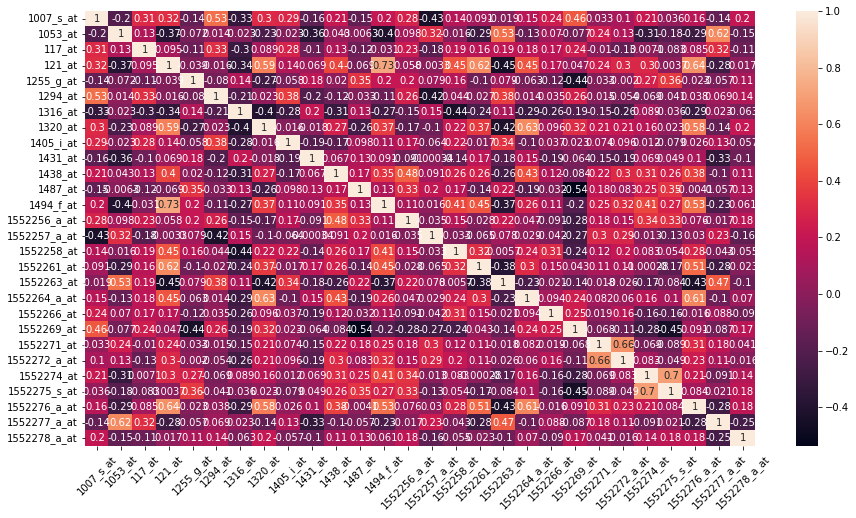

In [ ]:
plt.figure(figsize=(15,8))
a=df.corr()
sns.heatmap(a,annot=True, )
plt.xticks(rotation=45)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

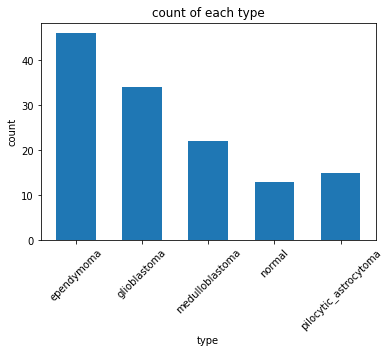

In [ ]:
plt.bar(df1['type'], df1['1007_s_at'], width =0.6)
plt.xlabel("type")
plt.ylabel("count")
plt.title("count of each type")
plt.xticks(rotation=45)

In [ ]:
mean_val = df.mean()
median_val = df.median()
print("mean of each column", mean_val)
print()
print("median of each column ", median_val)

mean of each column 1007_s_at       12.276393
1053_at          8.769583
117_at           7.722634
121_at           9.160209
1255_g_at        4.842069
1294_at          7.968388
1316_at          6.800111
1320_at          6.472452
1405_i_at        6.068968
1431_at          5.548389
1438_at          7.823669
1487_at          8.445412
1494_f_at        7.127061
1552256_a_at     9.429522
1552257_a_at     9.129369
1552258_at       6.015096
1552261_at       5.693111
1552263_at       6.829144
1552264_a_at     8.405683
1552266_at       6.013895
1552269_at       6.199752
1552271_at       6.858032
1552272_a_at     6.774547
1552274_at       7.548631
1552275_s_at     7.763072
1552276_a_at     6.665732
1552277_a_at     9.273505
1552278_a_at     6.771551
dtype: float64

median of each column  1007_s_at       12.502518
1053_at          8.786242
117_at           7.521674
121_at           9.194487
1255_g_at        4.462729
1294_at          7.915062
1316_at          6.654785
1320_at          6.401447
1405_

In [ ]:
df.sort_values(['type'])
df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
samples,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,7.541986,7.905140,7.108117,8.386617,8.412090,6.560058,5.779307,5.596102,9.128874,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891
835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,8.317030,8.269136,7.250662,9.208559,8.466202,5.822008,5.862887,5.573160,8.853524,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225
836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,7.661874,8.327897,7.557231,9.344553,9.161303,6.352456,5.703981,6.296894,8.912298,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615
837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,7.663790,7.730238,6.890946,8.996408,7.967699,5.565398,5.656941,7.255397,7.725901,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865
838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,9.521956,7.581397,6.927562,10.040652,9.611351,5.993222,5.874362,6.635761,9.721766,5.603343,8.221752,5.950401,5.752766,7.916434,8.139826,6.739943,9.620339,6.869073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,7.014209,8.666578,6.865731,10.233177,8.702926,6.022244,5.495157,7.732983,7.950551,6.092506,4.996330,6.648274,6.167474,7.350546,7.826477,6.518363,9.653409,6.987723
960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,7.981177,8.737005,6.972961,9.902292,9.495424,5.928188,5.715604,7.015560,8.860841,5.763458,5.379189,7.140106,6.773599,8.527913,8.150819,6.870945,9.880342,6.748734
961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,6.638493,8.724114,7.508863,9.638112,8.974358,5.593812,5.765813,7.701301,7.953218,5.794077,4.627095,6.598436,6.486709,7.797212,8.870719,6.302038,9.499624,6.871915


In [ ]:
df.fillna(mean_val, inplace=True)
df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
samples,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,7.541986,7.905140,7.108117,8.386617,8.412090,6.560058,5.779307,5.596102,9.128874,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891
835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,8.317030,8.269136,7.250662,9.208559,8.466202,5.822008,5.862887,5.573160,8.853524,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225
836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,7.661874,8.327897,7.557231,9.344553,9.161303,6.352456,5.703981,6.296894,8.912298,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615
837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,7.663790,7.730238,6.890946,8.996408,7.967699,5.565398,5.656941,7.255397,7.725901,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865
838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,9.521956,7.581397,6.927562,10.040652,9.611351,5.993222,5.874362,6.635761,9.721766,5.603343,8.221752,5.950401,5.752766,7.916434,8.139826,6.739943,9.620339,6.869073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,7.014209,8.666578,6.865731,10.233177,8.702926,6.022244,5.495157,7.732983,7.950551,6.092506,4.996330,6.648274,6.167474,7.350546,7.826477,6.518363,9.653409,6.987723
960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,7.981177,8.737005,6.972961,9.902292,9.495424,5.928188,5.715604,7.015560,8.860841,5.763458,5.379189,7.140106,6.773599,8.527913,8.150819,6.870945,9.880342,6.748734
961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,6.638493,8.724114,7.508863,9.638112,8.974358,5.593812,5.765813,7.701301,7.953218,5.794077,4.627095,6.598436,6.486709,7.797212,8.870719,6.302038,9.499624,6.871915


In [ ]:
print("mean", df['1007_s_at'].mean())
print(df[df['1007_s_at']>=df['1007_s_at'].mean()])

mean 12.276392910948678
                          type  1007_s_at  ...  1552277_a_at  1552278_a_at
samples                                    ...                            
834                 ependymoma  12.498150  ...      8.333490      6.699891
835                 ependymoma  13.067436  ...      7.985905      8.285225
836                 ependymoma  13.068179  ...      8.958272      5.966615
837                 ependymoma  12.456040  ...      9.477679      5.921865
838                 ependymoma  12.699958  ...      9.620339      6.869073
...                        ...        ...  ...           ...           ...
959      pilocytic_astrocytoma  12.658228  ...      9.653409      6.987723
960      pilocytic_astrocytoma  12.812823  ...      9.880342      6.748734
961      pilocytic_astrocytoma  12.706991  ...      9.499624      6.871915
962      pilocytic_astrocytoma  12.684593  ...      9.190213      7.262452
963      pilocytic_astrocytoma  12.397722  ...      9.404269      6.026150



In [ ]:
df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at
samples,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,7.541986,7.905140,7.108117,8.386617,8.412090,6.560058,5.779307,5.596102,9.128874,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891
835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,8.317030,8.269136,7.250662,9.208559,8.466202,5.822008,5.862887,5.573160,8.853524,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225
836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,7.661874,8.327897,7.557231,9.344553,9.161303,6.352456,5.703981,6.296894,8.912298,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615
837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,7.663790,7.730238,6.890946,8.996408,7.967699,5.565398,5.656941,7.255397,7.725901,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865
838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,9.521956,7.581397,6.927562,10.040652,9.611351,5.993222,5.874362,6.635761,9.721766,5.603343,8.221752,5.950401,5.752766,7.916434,8.139826,6.739943,9.620339,6.869073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,7.014209,8.666578,6.865731,10.233177,8.702926,6.022244,5.495157,7.732983,7.950551,6.092506,4.996330,6.648274,6.167474,7.350546,7.826477,6.518363,9.653409,6.987723
960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,7.981177,8.737005,6.972961,9.902292,9.495424,5.928188,5.715604,7.015560,8.860841,5.763458,5.379189,7.140106,6.773599,8.527913,8.150819,6.870945,9.880342,6.748734
961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,6.638493,8.724114,7.508863,9.638112,8.974358,5.593812,5.765813,7.701301,7.953218,5.794077,4.627095,6.598436,6.486709,7.797212,8.870719,6.302038,9.499624,6.871915


## General plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


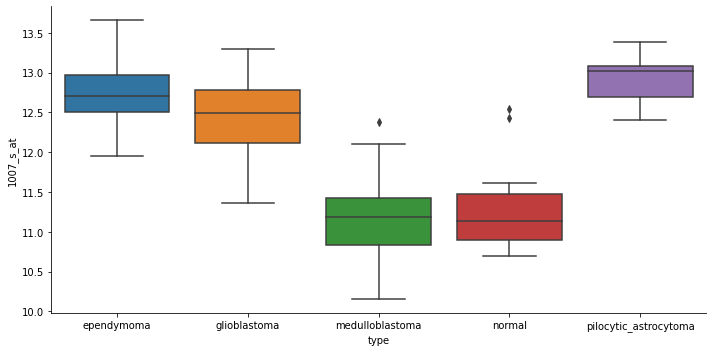

In [ ]:
sns.catplot('type','1007_s_at',data=df,kind='box',height=5,aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


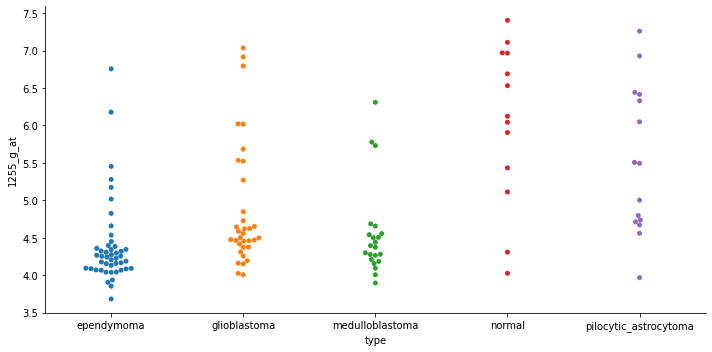

In [ ]:
sns.catplot('type','1255_g_at',data=df,kind='swarm',height=5,aspect=2)

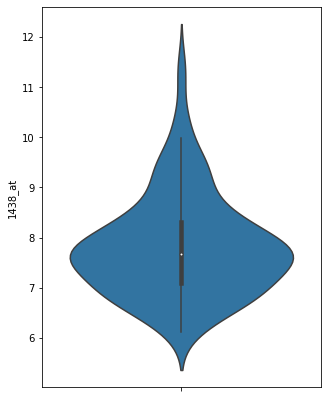

In [ ]:
fig, ax = plt.subplots(figsize =(5, 7))
sns.violinplot(ax=ax,y=df['1438_at'])

In [ ]:
dftest3=df3
dftest3

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,7.541986,7.905140,7.108117,8.386617,8.412090,6.560058,5.779307,5.596102,9.128874,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891,8.290555,6.330756,7.429331,8.271134,6.889821,6.789864,6.332943,6.743534,7.683195,6.725073,...,7.452986,6.286898,4.769155,4.687528,3.754204,3.896775,4.473275,8.171548,6.060622,8.841900,5.902276,3.907297,3.882678,3.890110,3.668144,3.390117,3.953972,3.529272,3.563981,4.574315,3.828851,4.483687,5.011438,5.773626,4.827817,5.877779,6.714268,6.080413,7.475681,7.086287,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,8.317030,8.269136,7.250662,9.208559,8.466202,5.822008,5.862887,5.573160,8.853524,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225,9.759504,5.638496,7.963333,6.503762,7.413667,8.128855,5.010720,6.483549,7.349033,6.153470,...,9.122687,6.487188,5.011087,5.125493,3.459905,3.475047,4.250283,8.026929,7.974346,9.139429,6.088559,3.955786,3.744942,3.475500,3.545111,3.288044,3.798083,3.465220,3.398081,4.279519,3.365857,3.673009,4.822057,5.048771,4.988880,7.645660,7.913366,7.398476,9.145736,9.137122,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,7.661874,8.327897,7.557231,9.344553,9.161303,6.352456,5.703981,6.296894,8.912298,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615,8.235646,5.393936,8.168913,7.446118,7.032315,7.511554,5.241585,6.878393,7.881382,6.073385,...,9.822739,6.453939,4.549771,4.578991,3.512840,3.480678,4.457866,8.097331,7.070830,9.434220,6.109699,4.096394,3.813011,3.387800,3.579731,3.307294,3.639748,3.256938,3.377463,4.280787,3.434739,3.541582,4.877465,5.268649,5.395714,7.933271,8.191778,7.930424,9.689873,9.609895,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,7.663790,7.730238,6.890946,8.996408,7.967699,5.565398,5.656941,7.255397,7.725901,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865,7.775342,4.808373,7.077664,8.321482,7.732976,9.187663,4.644900,6.021278,8.720681,6.124541,...,8.028984,11.005884,12.747103,11.065442,3.516075,3.584663,4.171380,7.079637,12.800238,10.747585,6.509987,4.243607,3.820466,3.584356,3.917221,3.455213,3.802537,3.803922,3.467714,4.268587,3.380387,3.593411,4.956109,4.774260,4.626221,8.613308,8.654348,8.623225,9.9

In [ ]:
y3=dftest3['type']

x3=dftest3.drop('type', axis =1)

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cluster_names = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']

pca = PCA(n_components=2)
new_X = pca.fit_transform(x3)

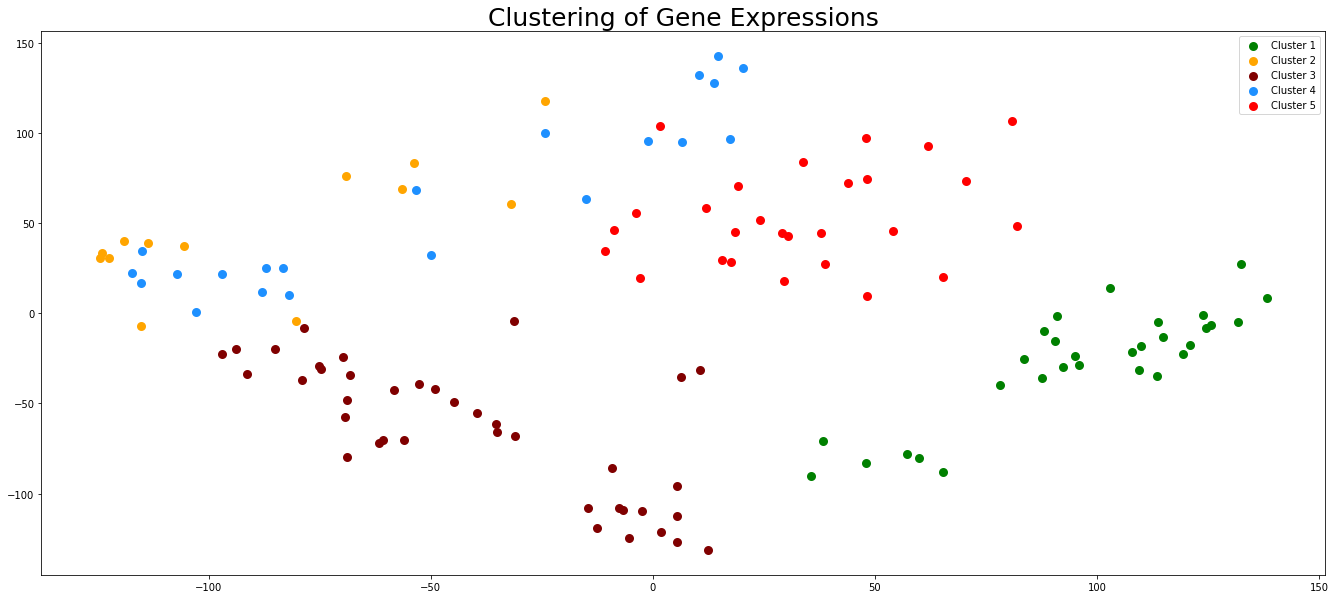

In [ ]:
plt.figure(figsize=(23,10))
palette = ['green','orange','maroon','dodgerblue','red']

for cluster_value, cluster_name, color in zip([0,1,2,3,4], cluster_names, palette):
  plt.scatter(new_X[predictions==cluster_value,0], new_X[predictions==cluster_value,1], color=color, lw=3,label=cluster_name)
plt.title('Clustering of Gene Expressions',fontdict = {'fontsize' : 25})
plt.legend(loc=1);

Silhouette Score for k value

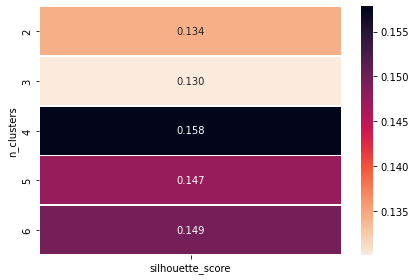

In [ ]:
from sklearn.metrics import silhouette_score
clusters_range = range (2,7)

results = []

for c in clusters_range:
    clusterer = KMeans (init='k-means++', n_clusters=c, n_init=100, random_state=0)
    cluster_labels = clusterer. fit_predict(x3)
    silhouette_avg = silhouette_score (x3, cluster_labels)

    results.append ( [c,silhouette_avg])



result = pd.DataFrame (results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()

sns.heatmap (pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# **K-means Clustering**


## Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct subgroups (clusters) where each data point belongs to only one group

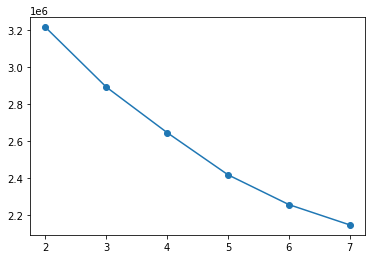

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x3)
from sklearn.cluster import KMeans
clusters_range=[2,3,4,5,6,7]
inertias =[]
for c in clusters_range:
    km = KMeans(n_clusters=c, init='k-means++', n_init=100, random_state=0)
    km.fit(x3)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(clusters_range,inertias,marker='o')
plt.show()

In [ ]:
from sklearn.cluster import KMeans, k_means
    # Running Kmeans
X_train = x3

    # We will start with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X_train)

    # Prints the clusters assigned to each gene
print('The Clusters are: ', kmeans.labels_)

    # Prints the inertia
print('\nThe Inertia is: ', kmeans.inertia_)

The Clusters are:  [2 2 2 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4
 4 4 4 4 4 4 4 4 4 1 1 4 4 4 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 1 1 1 1 4 1 1 4
 0 4 4 4 4 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 1 1 1 4 4 1 4 4 4 4 4]

The Inertia is:  2418922.4306699424


In [ ]:
    # Running Kmeans on 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

count_df = pd.DataFrame(counts, columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
count_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,30,13,39,21,27


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


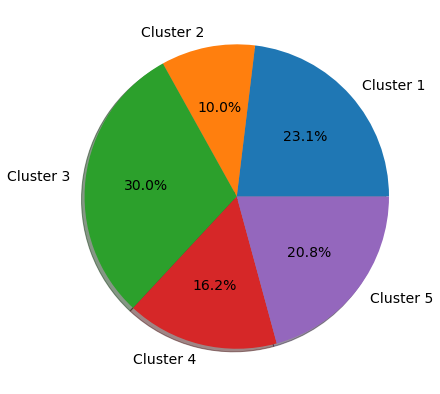

In [ ]:
plt.figure(figsize=(7,7))
explode = [0,0,0,0,0]
plt.pie(count_df,autopct='%1.1f%%',shadow = True, explode=explode, labels=count_df.columns, textprops={'fontsize': 14});

In [ ]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 2, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
predictions

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 2, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2],
      dtype=int32)

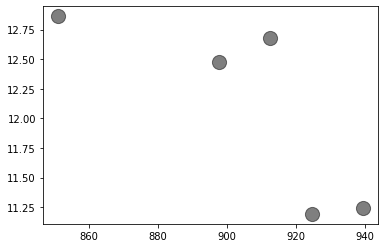

In [ ]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

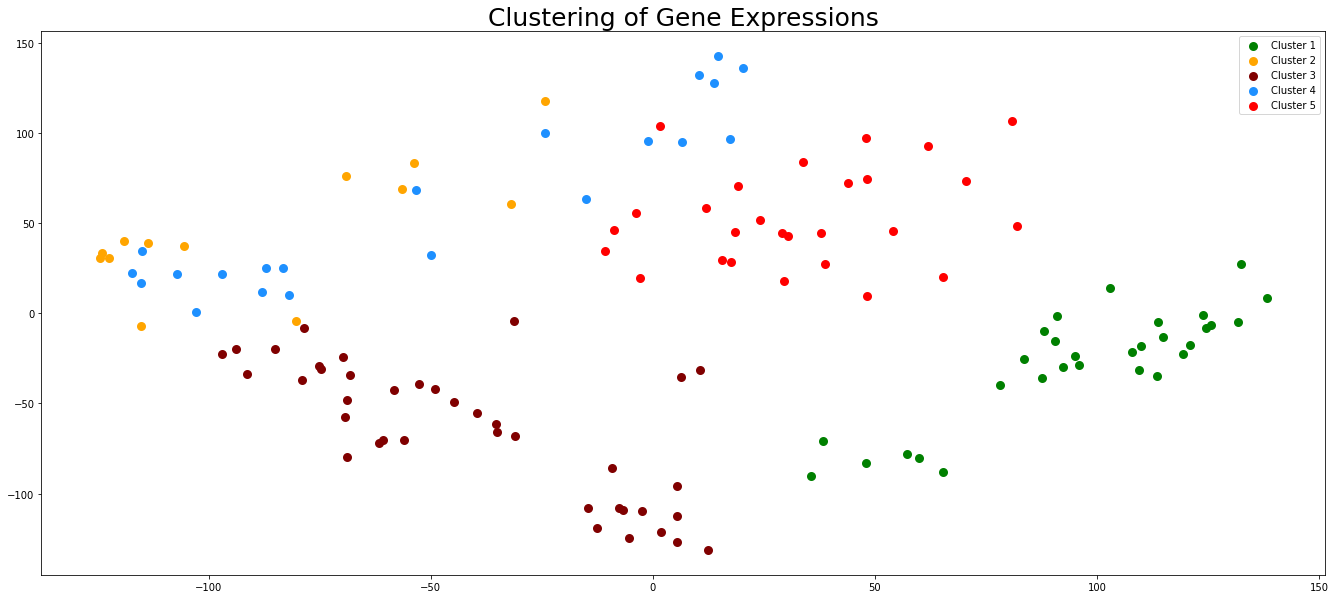

In [ ]:
plt.figure(figsize=(23,10))
palette = ['green','orange','maroon','dodgerblue','red']

for cluster_value, cluster_name, color in zip([0,1,2,3,4], cluster_names, palette):
  plt.scatter(new_X[predictions==cluster_value,0], new_X[predictions==cluster_value,1], color=color, lw=3,label=cluster_name)
plt.title('Clustering of Gene Expressions',fontdict = {'fontsize' : 25})
plt.legend(loc=1);


In [ ]:
y3.unique()

array(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal',
       'pilocytic_astrocytoma'], dtype=object)

In [ ]:
new_X_df = pd.DataFrame(new_X)
new_X_df

,0,1
0,138.119814,8.283004
1,90.990164,-1.565503
2,87.530876,-35.828689
3,5.474643,-95.872924
4,95.888006,-28.375355
...,...,...
125,-74.693643,-30.777378
126,-31.235504,-3.968343
127,-91.347345,-33.846540
128,-96.923709,-22.670365


# Mean-shift clustering

In [ ]:
from sklearn.cluster import MeanShift

model = MeanShift()
model.fit(new_X_df)
meanshift_labels = model.labels_
meanshift_labels

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[-65.15217156,  -1.5716193 ],
       [ 67.13300778,  17.9376511 ]])

In [ ]:
len(set(meanshift_labels))

2

In [ ]:
new_X_values = new_X_df.values

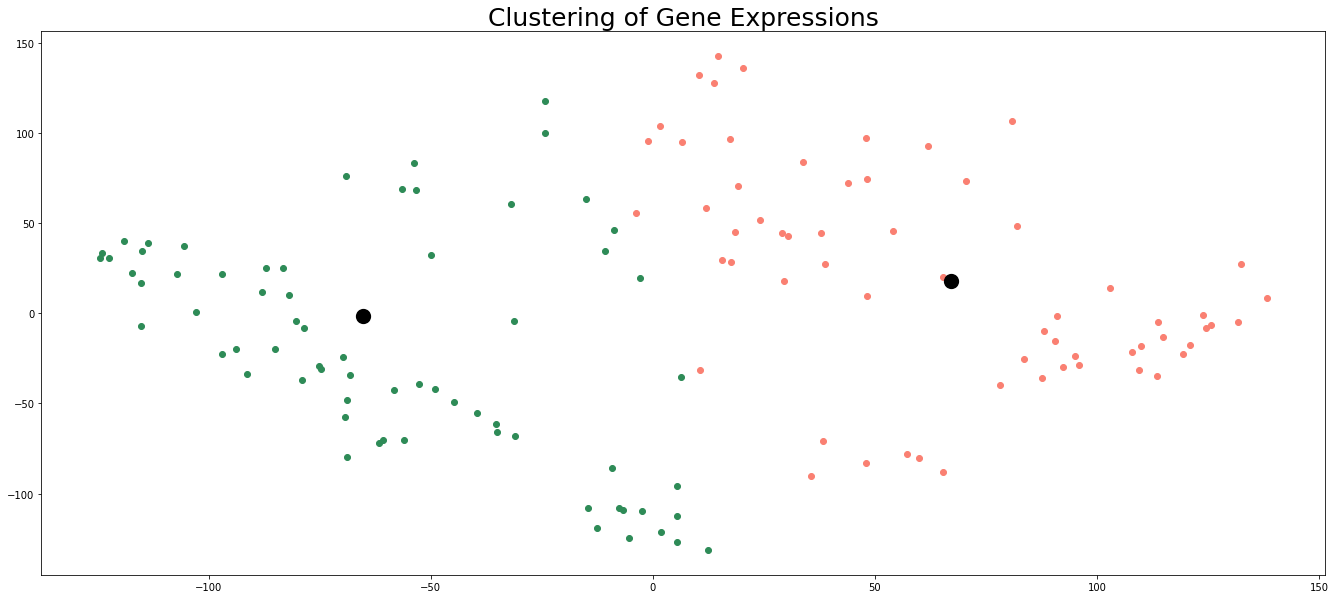

In [ ]:
palette = {0:'seagreen',1:'salmon'}
plot_label = {0:'Cluster 1',1:'Cluster 2'}

fig, ax = plt.subplots(figsize=(23,10))

for i in range(len(new_X_values)):
  ax.scatter(new_X_values[i][0], new_X_values[i][1], c=palette[meanshift_labels[i]])
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], color='black', s=150, lw = 3)

plt.title('Clustering of Gene Expressions',fontdict = {'fontsize' : 25})
plt.show();

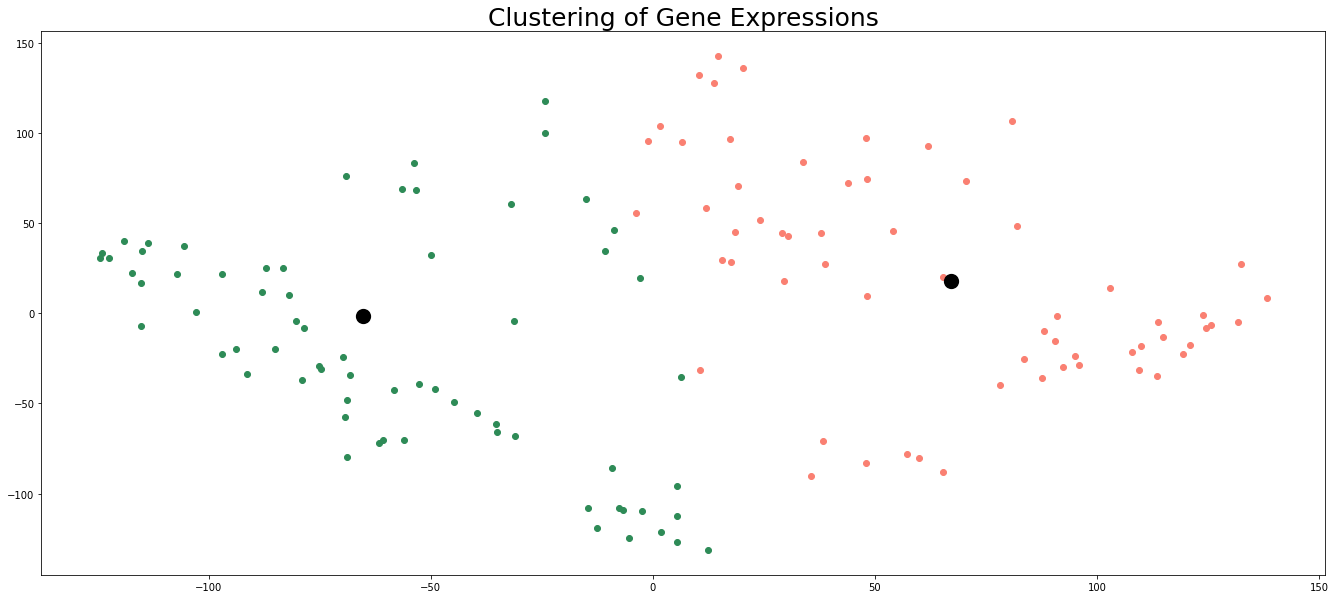

In [ ]:
palette = {0:'seagreen',1:'salmon'}
plot_label = {0:'Cluster 1',1:'Cluster 2'}

fig, ax = plt.subplots(figsize=(23,10))

for i in range(len(new_X_values)):
  ax.scatter(new_X_values[i][0], new_X_values[i][1], c=palette[meanshift_labels[i]])
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], color='black', s=150, lw = 3)

plt.title('Clustering of Gene Expressions',fontdict = {'fontsize' : 25})
plt.show();

In [ ]:
set(y3)

{'ependymoma',
 'glioblastoma',
 'medulloblastoma',
 'normal',
 'pilocytic_astrocytoma'}

# Which algorithm is better?


### Using Silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(new_X_df, meanshift_labels)
print('Mean-Shift Clustering:',score)

Mean-Shift Clustering: 0.402104069628706


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(new_X_df, kmeans_labels)
print('Kmeans Clustering:',score)

Kmeans Clustering: 0.32275865017393585


### Using Calinski-Harabasz Index

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:

score = calinski_harabasz_score(new_X_df, meanshift_labels)
print('Mean-Shift Clustering:',score)

Mean-Shift Clustering: 96.16838614716295


In [ ]:
score = calinski_harabasz_score(new_X_df, kmeans_labels)
print('Kmeans Clustering:',score)

Kmeans Clustering: 87.44978569174076


###Using Davies-Bouldin Index

In [ ]:
from sklearn.metrics.cluster import davies_bouldin_score

In [ ]:
score = davies_bouldin_score(new_X_df, meanshift_labels)
print('Mean-Shift Clustering:',score)

Mean-Shift Clustering: 1.051081415407027


In [ ]:
score =davies_bouldin_score(new_X_df, kmeans_labels)
print('Kmeans Clustering:',score)

Kmeans Clustering: 1.6455959933871749


# **CONCLUSION**

# We can conclude that the Mean shift clustering fits perfectly for our case study scenario